In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv("profiles.csv")
df.info()

/var/folders/j_/xgvzbrt119v6lnhbyn1b46940000gn/T/ipykernel_1749/1308678544.py:1: DtypeWarning: Columns (23267) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("profiles.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Columns: 23269 entries, __v to userId
dtypes: bool(1), float64(23245), int64(8), object(15)
memory usage: 214.6+ MB


In [5]:
convo_user = df[['conversationsMeta.averageConversationLength',\
         'conversationsMeta.averageConversationLengthInDays', 'conversationsMeta.longestConversation',\
         'conversationsMeta.longestConversationInDays', 'conversationsMeta.medianConversationLength',\
         'conversationsMeta.medianConversationLengthInDays', 'conversationsMeta.nrOfConversations',\
         'conversationsMeta.nrOfGhostingsAfterInitialMessage', 'conversationsMeta.nrOfOneMessageConversations',\
         'conversationsMeta.percentOfOneMessageConversations', 'user.ageFilterMax', 'user.ageFilterMin',\
         'user.birthDate', 'user.createDate', 'user.education',\
         'user.gender', 'user.genderFilter', 'user.instagram', 'user.interestedIn',\
         'user.jobs', 'user.schools', 'user.spotify']]

In [6]:
print(convo_user)

      conversationsMeta.averageConversationLength  \
0                                        8.560217   
1                                        4.495690   
2                                        4.254125   
3                                        7.893617   
4                                        6.824475   
...                                           ...   
1204                                    12.875000   
1205                                     2.440945   
1206                                     3.400000   
1207                                     8.564334   
1208                                    14.636364   

      conversationsMeta.averageConversationLengthInDays  \
0                                             10.236620   
1                                              3.973980   
2                                              3.465479   
3                                              5.878985   
4                                              1.924996   
...      

In [7]:
convo_user.to_csv('ProfilesNoConvo.csv')

In [8]:
convo_only = df['conversations']

In [9]:
print(convo_only)

0       [{"match_id":"Match 739","messages":[{"to":738...
1       [{"match_id":"Match 464","messages":[{"to":463...
2       [{"match_id":"Match 303","messages":[{"to":302...
3       [{"match_id":"Match 47","messages":[{"to":46,"...
4       [{"match_id":"Match 809","messages":[{"to":808...
                              ...                        
1204    [{"match_id":"Match 8","messages":[{"to":7,"fr...
1205    [{"match_id":"Match 254","messages":[]},{"matc...
1206    [{"match_id":"Match 35","messages":[{"to":34,"...
1207    [{"match_id":"Match 443","messages":[{"to":442...
1208    [{"match_id":"Match 11","messages":[{"to":10,"...
Name: conversations, Length: 1209, dtype: object


In [10]:
convo_only.to_csv('convosOnly.csv')

Text(0, 0.5, 'Number of Users')

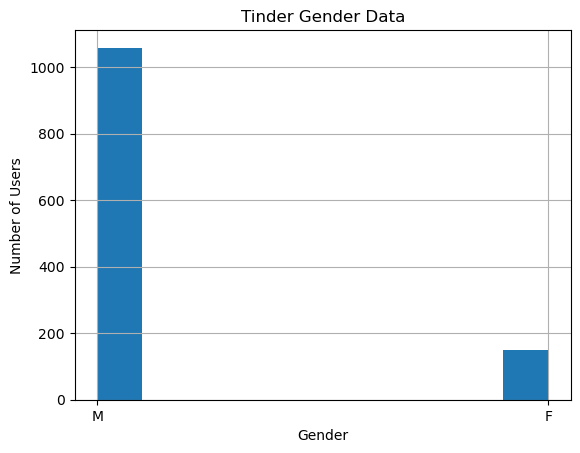

In [11]:
profilegender = convo_user['user.gender']
profilegender.hist()
plt.title("Tinder Gender Data")
plt.xlabel("Gender")
plt.ylabel("Number of Users")

In [12]:
"""md = pd.read_csv('ProfilesNoConvo.csv')

# Drop duplicates
md = md.drop_duplicates(keep=False)

# Convert 'birthDate' and 'createDate' from ISO 8601 format to datetime objects, then to date
md['birthDate'] = pd.to_datetime(md['birthDate']).dt.date
md['createDate'] = pd.to_datetime(md['createDate']).dt.date

# Calculate the age by rounding the difference between 'createDate' and 'birthDate' divided by 365
md['Age'] = ((md['createDate'] - md['birthDate']) / pd.Timedelta(days=365)).round().astype(int)
md['age'] = md['Age'].astype(str).str[:3].astype(int)

# Drop the 'Age' column as it's no longer necessary
md.drop(columns=['Age'], inplace=True)

# Replace empty lists with NaN
md = md.applymap(lambda x: pd.NA if isinstance(x, list) and not x else x)

md.to_csv('md.csv')"""

KeyError: 'birthDate'

In [ ]:
userage = md['age']
userage.hist()
plt.title("Tinder Age Data")
plt.xlabel("Age")
plt.ylabel("Number of Users")

In [ ]:
import numpy as np
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv("message_contents.csv")

In [ ]:
# (Q1C)
"""

# This preprocesses our data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function used to preprocess
def preprocess(text):
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    
    # Remove @ mentions
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize and lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

# Pre-processed training dataset
train['message_content'] = train['message_content'].apply(preprocess)

# Pre-processed development dataset
# develop['text'] = develop['text'].apply(preprocess)"""

In [18]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Load the data
df = pd.read_csv('message_contents.csv')



In [16]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    # Check if the text is a string
    if not isinstance(text, str):
        return ''  # or you could use 'return text' to return it unchanged
    
    if words_to_remove:
        # Create a regular expression pattern to match any of the words to remove
        pattern_to_remove = '|'.join(map(re.escape, words_to_remove))
        text = re.sub(pattern_to_remove, '', text)
    
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

words_to_remove = ['rsquo']

# Clean the data
df['cleaned_content'] = df['message_content'].apply(clean_text)
df = df['cleaned_content']

# Save the cleaned data to a new CSV
df.to_csv('cleanmessages_3.csv', index=False)

In [20]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yosephyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
from nltk import pos_tag
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    """
    Convert the part-of-speech naming scheme from the Penn Treebank tag to a WordNet lemmatizer compatible tag.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

def clean_text(text, words_to_remove=None):
    if not isinstance(text, str):
        return ''
    
    if words_to_remove:
        pattern_to_remove = '|'.join(map(re.escape, words_to_remove))
        text = re.sub(pattern_to_remove, '', text)
    
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Tag POS to tokens
    tagged_tokens = pos_tag(tokens)
    # Lemmatize with POS
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in tagged_tokens]
    
    return ' '.join(lemmatized_tokens)


# Clean the data
df['cleaned_content'] = df['message_content'].apply(clean_text)
df = df['cleaned_content']

# Save the cleaned data to a new CSV
df.to_csv('cleanmessages_4.csv', index=False)

In [1]:
import pandas as pd
from collections import Counter
import re

# Load the CSV file
file_path = 'cleanmessages.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract the text from the 'cleaned_content' column
texts = data['cleaned_content'].dropna()

# Combine all texts into a single string
combined_text = ' '.join(texts)

# Remove punctuation and non-alphabetic characters, then convert to lower case
cleaned_text = re.sub('[^A-Za-z]+', ' ', combined_text).lower()

# Split the text into words
words = cleaned_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Print the top 10 words
for word, count in top_10_words:
    print(f"{word}: {count}")

i: 486659
a: 388888
you: 378912
to: 304901
the: 246670
in: 189062
and: 184117
it: 167820
of: 129089
so: 124891


In [4]:
# Saving the modified dataframe to a new CSV file
import pandas as pd

# Load the CSV file
df = pd.read_csv('md.csv')


# Calculating the new column 'GhostRatio'
# Adding a small value to avoid division by zero in case nrOfConversations is zero
df['GhostRatio'] = df['nrOfGhostingsAfterInitialMessage'] / (df['nrOfConversations'] + 0.00001)


modified_csv_path = 'md_modified.csv'
df.to_csv(modified_csv_path, index=False)

modified_csv_path


'md_modified.csv'

In [5]:
# Load the modified dataset
file_path = 'md_modified.csv'
df = pd.read_csv(file_path)

# Splitting the dataframe based on 'Gender'
df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

# Saving the split dataframes to new CSV files
male_csv_path = 'md_modified_male.csv'
female_csv_path = 'md_modified_female.csv'

df_male.to_csv(male_csv_path, index=False)
df_female.to_csv(female_csv_path, index=False)

male_csv_path, female_csv_path


('md_modified_male.csv', 'md_modified_female.csv')

In [40]:
import pandas as pd

# Load the md_modified.csv file
md_df = pd.read_csv('md_modified.csv')

# Load the cleanmessages.csv file
clean_messages_df = pd.read_csv('cleaned_messages.csv')

# Merge the two dataframes based on a common column, such as an ID or index
merged_df = pd.merge(md_df, clean_messages_df, how='left', on='id')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('firstlinemerge.csv', index=False)

In [13]:
import pandas as pd

# Re-importing the dataset as the previous state was reset
file_path = 'merged_file.csv'
df = pd.read_csv(file_path)

# Selecting the specified columns
selected_columns = ['id', 'averageConversationLength', 'nrOfConversations', 'nrOfGhostingsAfterInitialMessage', 
                    'gender', 'age', 'GhostRatio', 'conversations']
cleaned_df = df[selected_columns]

# Saving the cleaned dataframe to a new CSV file
cleaned_file_path = 'precleaned_file.csv'
cleaned_df.to_csv(cleaned_file_path, index=False)

In [18]:
import pandas as pd
import json

# Load the CSV file to understand its structure
df = pd.read_csv('precleaned_file.csv')

# We will now iterate over all conversation entries in the dataset and extract the message content
# where available.

# This function will extract message contents from a conversation JSON.
def extract_message_contents(conversation_json):
    message_contents = []
    for match in conversation_json:  # Each match in the conversation list
        for message in match.get('messages', []):  # Each message in the messages list
            if 'message' in message:  # Check if the message key is present
                message_contents.append(message['message'])
    return message_contents

# List to hold all message contents
all_message_contents = []

# Iterate over all rows in the dataframe
for conversation_str in df['conversations']:
    try:
        # Load the JSON content
        conversation_json = json.loads(conversation_str)
        # Extract message contents and extend the list
        all_message_contents.extend(extract_message_contents(conversation_json))
    except json.JSONDecodeError:
        # If JSON decoding fails, skip the row
        continue

# Since the user requested a CSV file, let's create one from the list of message contents.
# We will create a DataFrame and then save it as a CSV.

# Create a DataFrame with message contents
messages_df = pd.DataFrame(all_message_contents, columns=['message_content'])

# Define the path for the CSV file
csv_file_path = 'final.csv'

# Save the DataFrame to a CSV file
messages_df.to_csv(csv_file_path, index=False)

# Return the path for download
csv_file_path


'final.csv'

In [20]:
import pandas as pd
import json

# Load the CSV file to understand its structure
df = pd.read_csv('precleaned_file.csv')

# This function will extract message contents from a conversation JSON.
def extract_message_contents(conversation_json):
    message_contents = []
    for match in conversation_json:  # Each match in the conversation list
        for message in match.get('messages', []):  # Each message in the messages list
            if 'message' in message:  # Check if the message key is present
                message_contents.append(message['message'])
    return message_contents

# List to hold all message contents for each row
all_message_contents = []

# Iterate over all rows in the dataframe
for conversation_str in df['conversations']:
    try:
        # Load the JSON content
        conversation_json = json.loads(conversation_str)
        # Extract message contents and extend the list
        messages = extract_message_contents(conversation_json)
        all_message_contents.append(' '.join(messages))  # Join messages into a single string
    except json.JSONDecodeError:
        # If JSON decoding fails, skip the row
        all_message_contents.append(None)  # Append None for rows with decoding errors

# Replace the 'conversations' column in the dataframe with the extracted messages
df['conversations'] = all_message_contents

# Define the path for the CSV file
csv_file_path = 'final.csv'

# Save the modified DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Return the path for download
csv_file_path

'final.csv'

In [23]:
import pandas as pd
import json

# Load the CSV file
file_path = 'convosOnly.csv'
df = pd.read_csv(file_path)

# Function to extract 'message' from the 'conversations' column
def extract_messages(conversation_json):
    messages = []
    try:
        # Load the string as JSON
        data = json.loads(conversation_json)

        # Extract messages from each conversation
        for convo in data:
            for message in convo['messages']:
                messages.append(message.get('message', ''))
    except json.JSONDecodeError:
        pass  # In case of JSON decoding error, we skip the row

    return messages

# Applying the function to each row in the DataFrame
df['cleaned_messages'] = df['conversations'].apply(extract_messages)

# Keeping only the Unnamed Column and cleaned messages
cleaned_df = df[['Unnamed: 0', 'cleaned_messages']]


# Define the path for the CSV file
csv_file_path = 'idmessage.csv'

# Save the modified DataFrame to a CSV file
cleaned_df.to_csv(csv_file_path, index=False)

# Return the path for download
csv_file_path

'idmessage.csv'

In [24]:
import ast

# Function to clean up the 'cleaned_messages' column
def clean_messages(message_string):
    # Converting the string representation of list back to a list
    message_list = ast.literal_eval(message_string)
    
    # Removing empty strings and HTML entities
    cleaned_list = [msg.replace('&rsquo;', "'").replace('&apos;', "'") for msg in message_list if msg]
    
    return cleaned_list

# Applying the cleaning function to the 'cleaned_messages' column
df['cleaned_messages'] = df['cleaned_messages'].apply(clean_messages)

# Define the path for the CSV file
csv_file_path = 'idmessages.csv'

# Save the modified DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Return the path for download
csv_file_path

ValueError: malformed node or string: ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [28]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=0ac577f5a53d64013123b21395a656cd43c04326c626452033c1a8bf54adc8c3
  Stored in directory: /Users/yosephyan/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
from langdetect import detect, LangDetectException

def is_english(text_list):
    """Check if the concatenated text from a list of messages is in English."""
    if not text_list:
        return True  # Considering empty lists as English
    try:
        # Concatenate the text list to a single string for language detection
        concatenated_text = ' '.join(text_list)
        # Detect the language
        return detect(concatenated_text) == 'en'
    except LangDetectException:
        return False  # In case of detection error, consider as non-English

# Load the dataset
file_path = 'merged_file.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Convert the string representation of lists in 'cleaned_messages' back into lists
df['cleaned_messages'] = df['cleaned_messages'].apply(lambda x: eval(x))

# Apply the language detection function
df['is_english'] = df['cleaned_messages'].apply(is_english)

# Filter out non-English rows
df_filtered = df[df['is_english']]

# Drop the 'is_english' column as it's no longer needed
df_filtered = df_filtered.drop(columns=['is_english'])

# Save the filtered dataframe to a new CSV file
df_filtered.to_csv('filtered_file.csv', index=False)

In [31]:
# Re-loading the file and deleting rows where the 'cleaned_messages' column is empty
import pandas as pd

file_path = 'merged_file.csv'
df_merged = pd.read_csv(file_path)

# Assuming empty messages are represented by empty lists (i.e., '[]')
df_merged_non_empty = df_merged[df_merged['cleaned_messages'] != '[]']

# Define the path for the CSV file
csv_file_path = 'mergefile.csv'

# Save the modified DataFrame to a CSV file
df_merged_non_empty.to_csv(csv_file_path, index=False)

# Return the path for download
csv_file_path

'mergefile.csv'

In [36]:
import pandas as pd
import json

# Load the CSV file
df = pd.read_csv('convosOnly.csv')

# Ensure the 'Conversations' column is interpreted as JSON
df['Conversations'] = df['conversations'].apply(json.loads)

# Extract the 'message' field from each conversation
def extract_messages(conversations):
    return [msg['message'] for conv in conversations for msg in conv['messages']]

df['Messages'] = df['conversations'].apply(extract_messages)

# Select the required columns
cleaned_df = df[['id', 'match_id', 'Messages']]

# Save the cleaned data to a new CSV file
cleaned_df.to_csv('matches.csv', index=False)


TypeError: string indices must be integers, not 'str'

In [38]:
import pandas as pd
import json

# Load the file
file_path = 'convosOnly.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Define a function to extract relevant data
def extract_relevant_data(conversations_str):
    try:
        conversations = json.loads(conversations_str)
        relevant_data = []
        for convo in conversations:
            match_id = convo.get('match_id', '')
            for msg in convo.get('messages', []):
                message = msg.get('message', '')
                relevant_data.append({'match_id': match_id, 'message': message})
        return relevant_data
    except json.JSONDecodeError:
        return []

# Apply the function
df['extracted_data'] = df['conversations'].apply(extract_relevant_data)

# Explode the dataframe
exploded_df = df.explode('extracted_data')

# Extract 'match_id' and 'message'
exploded_df['match_id'] = exploded_df['extracted_data'].apply(lambda x: x.get('match_id') if isinstance(x, dict) else None)
exploded_df['message'] = exploded_df['extracted_data'].apply(lambda x: x.get('message') if isinstance(x, dict) else None)

# Drop unnecessary columns
final_df = exploded_df.drop(columns=['conversations', 'extracted_data'])

# Save to a new CSV file
output_file_path = 'matches.csv'  # Replace with your desired output path
final_df.to_csv(output_file_path, index=False)


In [39]:
import pandas as pd

# Load the CSV file
file_path = 'matches.csv'  # Replace with the path to your file
df = pd.read_csv(file_path)

# Delete rows where the 'message' column is empty
df_cleaned = df.dropna(subset=['message'])

# Save the cleaned dataframe back to CSV
output_file_path = 'cleaned_matches.csv'  # Replace with your desired output path
df_cleaned.to_csv(output_file_path, index=False)


/var/folders/j_/xgvzbrt119v6lnhbyn1b46940000gn/T/ipykernel_70792/3355182166.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [41]:
import ast

# Function to clean up the 'cleaned_messages' column
def clean_messages(message_string):
    # Converting the string representation of list back to a list
    message_list = ast.literal_eval(message_string)
    
    # Removing empty strings and HTML entities
    cleaned_list = [msg.replace('&rsquo;', "'").replace('&apos;', "'") for msg in message_list if msg]
    
    return cleaned_list

# Applying the cleaning function to the 'cleaned_messages' column
df['cleaned_messages'] = df['cleaned_messages'].apply(clean_messages)

# Displaying the cleaned data
df.head()


# Define the path for the CSV file
csv_file_path = 'newmatches.csv'

# Save the modified DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

# Return the path for download
csv_file_path

KeyError: 'cleaned_messages'

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the new dataset
file_path = 'mergefile.csv'
data_new = pd.read_csv(file_path)

# Preprocessing the data
# Extracting the 'cleaned_messages' and 'averageConversationLength' columns
# Each list of messages is treated as a single document
X_new = data_new['cleaned_messages'].fillna("missingtext")
y_new = data_new['averageConversationLength']

# Convert 'averageConversationLength' to a binary variable (above/below median)
median_length_new = y_new.median()
y_binary_new = (y_new > median_length_new).astype(int)

# Split the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_binary_new, test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer_new = CountVectorizer(stop_words='english', max_features=1000)
X_train_vectorized_new = vectorizer_new.fit_transform(X_train_new)
X_test_vectorized_new = vectorizer_new.transform(X_test_new)

# Fit the logistic regression model
model_new = LogisticRegression(max_iter=1000)
model_new.fit(X_train_vectorized_new, y_train_new)

# Predict and evaluate the model
y_pred_new = model_new.predict(X_test_vectorized_new)
mse_new = mean_squared_error(y_test_new, y_pred_new)

# Getting the feature names (words) and their coefficients
feature_names_new = vectorizer_new.get_feature_names_out()
coefficients_new = model_new.coef_[0]

# Sorting the coefficients and their corresponding words
sorted_indices_new = np.argsort(coefficients_new)
top_positive_words_new = [(feature_names_new[i], coefficients_new[i]) for i in sorted_indices_new[-20:]] # Words associated with longer conversations
top_negative_words_new = [(feature_names_new[i], coefficients_new[i]) for i in sorted_indices_new[:20]] # Words associated with shorter conversations

# Code output
print("MSE:", mse_new)
print("Top positive words:", top_positive_words_new)
print("Top negative words:", top_negative_words_new)


MSE: 0.2934472934472934
Top positive words: [('food', 0.36021892758576946), ('making', 0.361177885024646), ('things', 0.36198360067499596), ('em', 0.36299445165410216), ('understand', 0.36890354344456344), ('10', 0.3791131736817891), ('yes', 0.4037346124751181), ('times', 0.4084427873447398), ('general', 0.41625734309687906), ('beautiful', 0.4207402206511849), ('ho', 0.43034596201192016), ('glad', 0.4616808891969874), ('city', 0.4686655610106991), ('thailand', 0.46869770297690044), ('mean', 0.47505283636691664), ('18', 0.5188453262443327), ('casa', 0.5209516745337931), ('när', 0.584876336367318), ('een', 0.6147858836832564), ('ai', 0.6836720493721953)]
Top negative words: [('salut', -0.4982030915325349), ('summer', -0.49693788404284667), ('hoe', -0.47946430063884155), ('der', -0.4727149794454871), ('taking', -0.46113724125676664), ('thinking', -0.45076191338863447), ('miles', -0.4425170193641625), ('better', -0.43924124493139516), ('house', -0.3978548572686136), ('music', -0.3599558398

/Users/yosephyan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
